Populating the interactive namespace from numpy and matplotlib


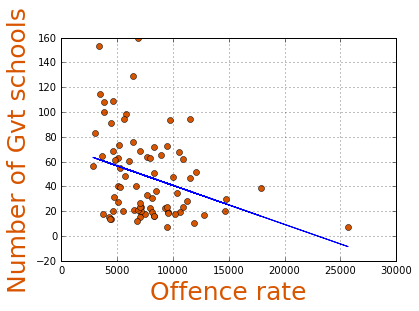

          0         0
0  1.000000 -0.326856
0 -0.326856  1.000000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
%pylab inline

def erp_per_lga(crime, lga):
    '''
    returns the estimated resident population for the local government area 
    for the year 2015
    '''
    erps = []
    erp_column = (crime.loc[(crime["reference_period"] == 2015)& \
                    (crime["Local_Government_Area"] == lga), ["LGA_ERP"]])
    erps = erp_column.values 
    return erps[0][0]

def num_govermentschools(edu,lga):
    ''' 
    Returns the sum of the Government schools in the specified LGA 
    using boolean indexing
    '''
    num = (edu.loc[(edu["Education_Sector"] == 'Government') & \
            (edu["Local_Government_Area"] == lga), \
            ["Education_Sector"]]).Education_Sector.value_counts()
    return (num[0])

def crime_by_LGA(crime, lga):
    '''
    returns the offence count per lga for the year 2015
    '''
    sum_crime = (crime.loc[(crime["reference_period"] == 2015) & \
                (crime["Local_Government_Area"] == lga) , ["Offence_Count"]])
    summ = sum_crime.sum()
    return (summ[-1])

def unique_lga(data):
    ''' 
    Returns a list with the unique LGAs in sorted order 
    '''
    lga =[]  
    all_lgas = data.Local_Government_Area.value_counts()  
    for key,value in all_lgas.iteritems():
        lga.append(key)
    lga.sort()
    return (lga)
    
def coordinates(crime, edu):
    ''' 
    Returns lists of coordinate points
    '''
    lgas, sum_crimes, sum_gvt_schools, erps = [], [], [],[],
    #list of the unique local government areas
    lgas = unique_lga(crime)
    for lga in lgas:
        erp = erp_per_lga(crime, lga)
        erps.append(erp)
        #crime for each lga
        lga_crime = crime_by_LGA(crime, lga)
        lga_crime = (lga_crime/erp)*100000
        sum_crimes.append(lga_crime)
        #government school numbers by lga 
        lga_gvt_schools = num_govermentschools(edu, lga)
        lga_gvt_schools = (lga_gvt_schools/erp)*100000
        sum_gvt_schools.append(lga_gvt_schools)

    return(sum_crimes, sum_gvt_schools, lgas)
    
def scatter_plot(offences,num_schools, lgas):
    ''' 
    scatter plot depending what lists are passed to it as x or y cordinates
    '''
    plt.plot(offences, num_schools, 'bo', color= (.847, .333, 0))

    #This commented out code was used to determine what LGA each point 
    #in the scatter plot related to
    '''
    for label, x, y in zip(lgas, offences, num_schools):
        plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    '''
    
    #This commented out code was used to plot the line of best fit
    
    plt.plot(offences, np.poly1d(np.polyfit(offences, num_schools, 1))\
             (offences))


    plt.xlabel("Offence rate", color= (.847, .333, 0), fontsize = 25)
    plt.ylabel("Number of Gvt schools", color= (.847, .333, 0), fontsize = 25)
    plt.grid(True)
    plt.show()

def main(): 
    offences, num_schools, num_gvt_schools, offence_cat, lgas = [], [], [], [], []
    crime = pd.read_csv("crimebylocationdatatable.csv")  
    edu = pd.read_csv("all_school.csv")
    #creates cordinate points for the scatter plot
    offences, num_gvt_schools, lgas = coordinates(crime, edu)
    #plotting scatter plot
    scatter_plot(offences, num_gvt_schools, lgas)
    
    
    #creates and writes to a file, the coordinates of each data point.
    #this is used for the k-means algorithm
    f = open("merge_output.csv", "w")
    for i in range(len(offences)):
        f.write("{},{}\n".format(offences[i], num_gvt_schools[i]))
    f.close()
    #calculating the Pearsons correlation coefficient
    
    df1 = pd.DataFrame(offences)
    df2 = pd.DataFrame(num_gvt_schools)
    result = pd.concat([df1, df2], axis=1)
    pearsons = result.corr(method='pearson')
    print(pearsons)
    
if __name__ == "__main__":
    main()